# #TDI 

####Hypothesis Testing: Let’s talk about t-tests, p-values. How are they related? What is it telling you? How does it relate to precision-recall? What are the underlying assumptions?


In [1]:
options(repos = c('https://cloud.r-project.org/'))
install.packages(c("ggplot2", "dplyr", "sciplot", "repr"))

Installing packages into 'C:/Users/Natalie/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'ggplot2' successfully unpacked and MD5 sums checked
package 'dplyr' successfully unpacked and MD5 sums checked
package 'sciplot' successfully unpacked and MD5 sums checked
package 'repr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Natalie\AppData\Local\Temp\Rtmpi4fsjt\downloaded_packages


Let's say you have two groups of friends, those you met in undergrad and those you met in graduate school. You suspect that the IQ's of these two groups are different, but how do you know for sure? The t-test! 


### You use a t-test to compare the means (averages) between two groups and determine if one group is different than the other. 
Statistics help us do more than just compare the means. After all, many groups can have the same mean with drastically different individual scores.

Let's take a look at the IQ scores of these two groups:

In [3]:
friendIQ=read.csv("SampleData/FriendIQ.csv")
head(friendIQ)

undergrad,grad
85,94
88,96
91,96
93,97
97,98
99,102


Let's look at some summary statistics for each group:

In [ ]:
sum.stat=function(x) {round(c(mean=mean(x), median=median(x), sd=sd(x), max=max(x), obs=length(x)),2)}
sapply(friendIQ, sum.stat)

hmmmmm, it seems like the undergrad group has lower IQ scores than the graduate group. If we want to test this, we need to use a t-test. 

A t-test, like all statistical tests, calculates a 'test statistic' and compares it to a known 'critical value'. If the test statistic is larger than the critical value, we then conclude that our result is not due to chance and is a 'real' result. When this occurs we 'reject the null hypothesis'. The null hypothesis is usually benign, for example, "the treatment had no effect on patient survival" or "group A and B lost the same amount of weight". We are really interested in what happens if we reject the null. For example, we can say "the treatment did effect patient survival" and we want to invest more money in this drug development.


A critical value is calculated with the sample data characterisitics (i.e, degrees of freedom, and distribution) and a selected error rate. An error rate $\alpha$, is usually set at 0.05, and this means there is a 5% chance the result is due to random error and not a real result. This error rate is called the 'p-value', and the lower the p-value the lower the chance that our result is due to random chance. Small p-values indicate real results, not those from randomness.

##### For 1-tailed test, the area to the right of the critical value = 0.05, shown below in gray.

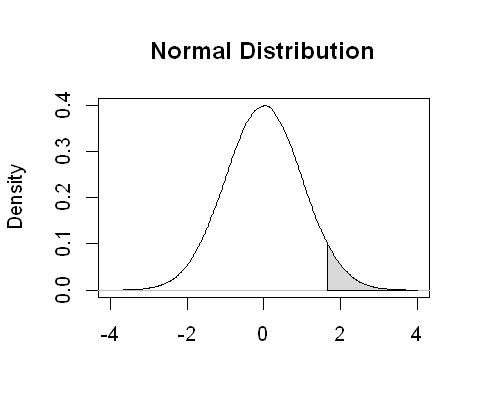

In [9]:
options(repr.plot.width=4, repr.plot.height=3.5)
draws <- rnorm(1000000, mean=0, sd=1) #random values from t-distribution
dens <- density(draws) #desnity distribution of random draws from t-distribution
criticalvaluehigh=quantile(draws, .95) #critical value of upper tail

indexhigh=min(which(dens$x >=criticalvaluehigh)) #critical value high
right=max(which(dens$x<4)) #end. The area between indexhigh and right should be 0.025

plot(dens, xlim=c(-4,4), xlab="", main="Normal Distribution")
with(dens, polygon(x=c(x[c(indexhigh,indexhigh:right,right)]), y= c(0, y[indexhigh:right], 0), col="gray85")) #high tail

If our data calculates a test statistic larger than the critical value, then the area (or error rate) is less than 5%. This is the error we are able to tolerate, but if you are more conservative you can shrink this error and increase the critical value to ensure an even lower error rate.

The dark gray area represents our data where we are more certain (error rate <0.05) our data is a real result.


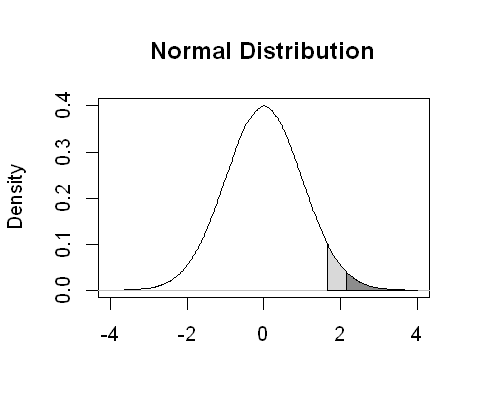

In [11]:
draws <- rnorm(1000000, mean=0, sd=1) #random values from t-distribution
dens <- density(draws) #desnity distribution of random draws from t-distribution
criticalvaluehigh=quantile(draws, .95) #critical value of upper tail

indexhigh=min(which(dens$x >=criticalvaluehigh)) #critical value high
indexhigh2=min(which(dens$x >=criticalvaluehigh+0.5))#new data critical value higher than 0.05 threshold
right=max(which(dens$x<4)) #end. The area between indexhigh and right should be 0.025

plot(dens, xlim=c(-4,4), xlab="", main="Normal Distribution")
with(dens, polygon(x=c(x[c(indexhigh,indexhigh:right,right)]), y= c(0, y[indexhigh:right], 0), col="gray85")) #high tail
with(dens, polygon(x=c(x[c(indexhigh2,indexhigh2:right,right)]), y= c(0, y[indexhigh2:right], 0), col="gray55"))#new data with a greater test statistic

Conversely, if our data calculates a test statisitc lower than the critical value, then the area is greater than 5%, and we have a larger error rate than we want. The dark gray area below is >0.05 and this means we are less certain that the results are real, and we would not reject the null hypothesis.

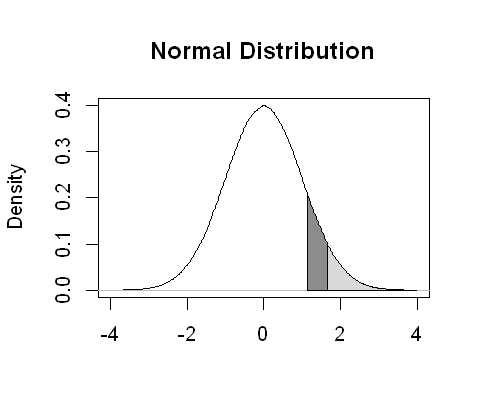

In [13]:
draws <- rnorm(1000000, mean=0, sd=1) #random values from t-distribution
dens <- density(draws) #desnity distribution of random draws from t-distribution
criticalvaluehigh=quantile(draws, .95) #critical value of upper tail

indexhigh=min(which(dens$x >=criticalvaluehigh)) #critical value high
indexhigh3=min(which(dens$x >=criticalvaluehigh-0.5))#new data critical value lower than 0.05 threshold
right=max(which(dens$x<4)) #end. The area between indexhigh and right should be 0.025

plot(dens, xlim=c(-4,4), xlab="", main="Normal Distribution")
with(dens, polygon(x=c(x[c(indexhigh3,indexhigh3:right,right)]), y= c(0, y[indexhigh3:right], 0), col="gray55"))#new data with a greater test statistic
with(dens, polygon(x=c(x[c(indexhigh,indexhigh:right,right)]), y= c(0, y[indexhigh:right], 0), col="gray85")) #high tail

Before we can use this statistical test, we have to first make sure our data satisfies the assumptions of the t-test. The assumptions are:

1. The data are continuous
2. The data follow a normal distribution
3. The samples are independent
4. The two groups have approximately equal variance

###### Assumption 1 is satisfied because these IQ scores could be any value on the scale. 
Even though the IQ scores are reported as discrete values (e.g., 100 and not 100.044), the IQ score could be any value and is not constrained as in other situations like a clinical trial with the number of cancer patients (there cannot be half a patient).



###### Assumption 2 can be checked by examining the data distribution for both groups.
A normal distribution follows a bell-curve. Let's look at the histograms of each group:

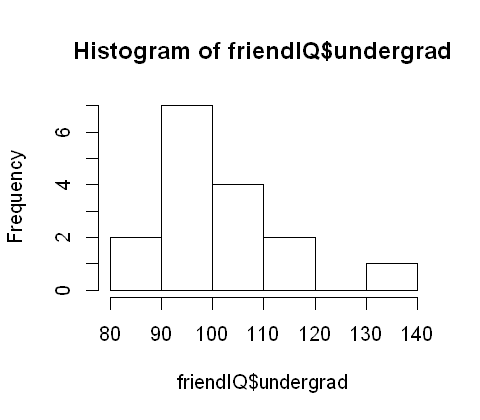

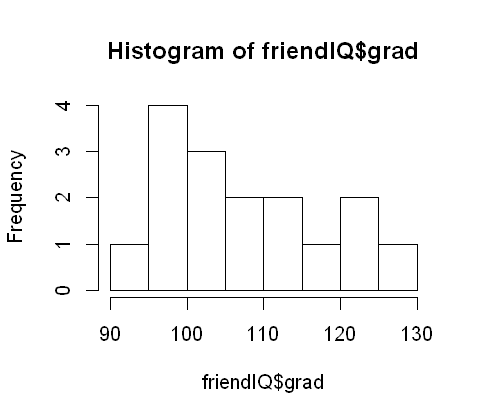

In [34]:
options(repr.plot.width=4, repr.plot.height=3.5)
hist(friendIQ$undergrad)
hist(friendIQ$grad)

If the data were normal, we would expect it to follow the typical bell-shaped curve. However, because our sample size is small, these histograms could actually come from a normal distribution. Here are some histograms generated with 16 observations from the normal distribution:

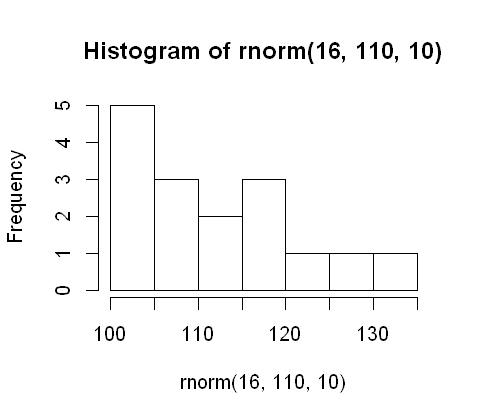

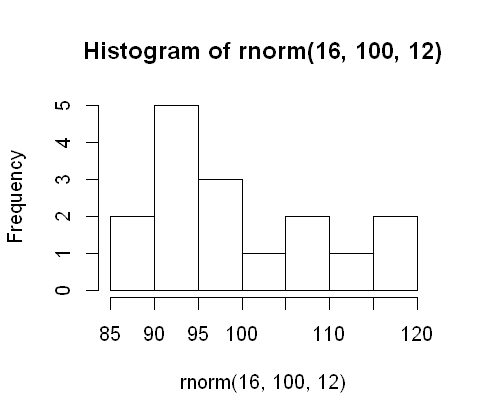

In [35]:
hist(rnorm(16, 110,10))

hist(rnorm(16, 100, 12))

##### We can test normality by completing shapiro-wilk test (the null hypothesis is that the data is normal):

In [36]:
shapiro.test(friendIQ$grad)


	Shapiro-Wilk normality test

data:  friendIQ$grad
W = 0.92722, p-value = 0.2202


Because the p-value is large (above the typical 0.05 threshold), this leads us to conclude the data is normal and not reject the null hypothesis. We'll discuss what exactly a p-value is in the next section.

###### Assumption 3, that the data are independent, is true because these are individual results from each person. 
One person's IQ is not affecting the other person's IQ. If people in the group were related or shared the high schools, the observations would not be independent.

###### Assumption 4, that the groups have equal variance, is checked by looking at the Q-Q plots:

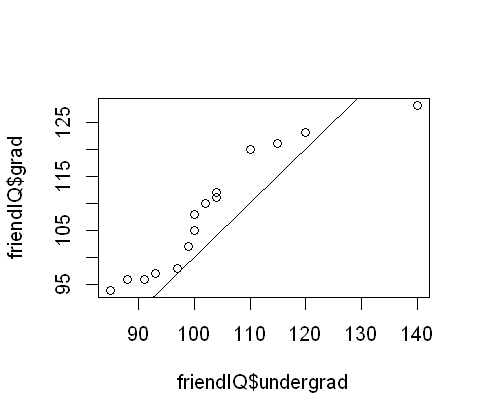

In [37]:
qqplot(friendIQ$undergrad, friendIQ$grad)
abline(0,1)


Unfortunately, it appears the quantiles for each group are not the same, and they have unequal variances. Lucky for us, a correction to the t-test can control for unequal variance. This uses a Welch's t-test. 

#### Now that we satisfied our assumptions to use the t-test, let's find out if our friend groups really do have different IQs! 

We will use the two sample t-test, where the null hypothesis is that the means of both groups are equal. 

Ho: mean undergrad IQ = mean grad IQ or
    mean undergrad IQ - mean grad IQ = 0

In [38]:
t.test(friendIQ$undergrad, friendIQ$grad)


	Welch Two Sample t-test

data:  friendIQ$undergrad and friendIQ$grad
t = -1.0989, df = 28.629, p-value = 0.281
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -13.595701   4.095701
sample estimates:
mean of x mean of y 
 102.9375  107.6875 


Let's walk through these results. First, your burning question is answered: Do my friend groups have different IQs???

The answer is 'NO'. 

How do we know this? The p-value for this statistical test, the comparison of two group means, is > 0.05, and suggests this observed difference is likely due to chance and not a true difference in the groups. This means, if each group is a random sampling from the larger population (i.e, the undergraduate school vs the graduate school) and this experiment were repeated many more times, you would likely see no difference in IQ means between the two groups.

How was this test done? Can I believe it?

This test, like all statistical tests, is done by comparing the data you have (observed) with an idealized or baseline scenario. We do this by comparing the calculated test statistic from our data against the expected test statistic with the same sample size and error threshold. Usually, we select an error threshold of 0.05, or a 5% chance that this result is due to randomness and not a real observed effect. If the absolute value of our test statistic is greater than the idealized test statistic, we reject the null hypothesis and conclude that this result was not due to chance alone.


Looking at the probability density function, we want to know the value where the area above this critical value is 5%, meaning only a 5% chance this value or higher would be observed due to chance.

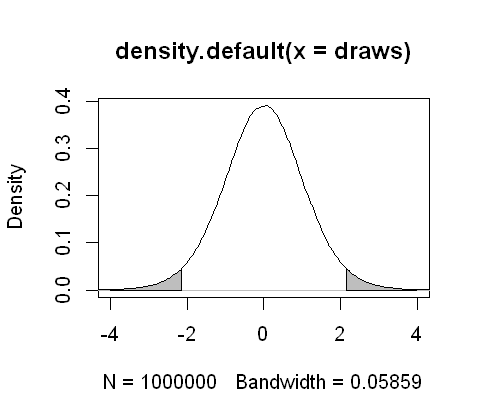

In [39]:
#curve(dt(x, df=15), -4,4)

draws <- rt(1000000, df=15) #random values from t-distribution
dens <- density(draws) #desnity distribution of random draws from t-distribution
criticalvaluelow=quantile(draws, .025) #critical value of lower tail
criticalvaluehigh=quantile(draws, .975) #critical value of upper ail

left=max(which(dens$x<=-4)) #zero, or starting point
indexlow=max(which(dens$x <=criticalvaluelow)) #critical value low, the area between left and indexlow should be 0.025 (half the allowable 0.05)
indexhigh=min(which(dens$x >=criticalvaluehigh)) #critical value high
right=max(which(dens$x<4)) #end. The area between indexhigh and right should be 0.025


plot(dens, xlim=c(-4,4))
with(dens, polygon(x=c(x[c(left,left:indexlow,indexlow)]), y= c(0, y[left:indexlow], 0), col="gray")) #low tail
with(dens, polygon(x=c(x[c(indexhigh,indexhigh:right,right)]), y= c(0, y[indexhigh:right], 0), col="gray")) #high tail


In this example, we would calculate the test statistic (t-value) for the idealized data from a t-distribution with n1+n2-2 degrees of freedom (df) at the 0.05 significance level.

$$t = y1 - y2/ sqrt{S1^2/n1 + S2^2/n2}$$

$$df = n1+n2-2$$ *adjusted for Welch unequal variance

y1 and y2 = group means
S1 and S2 = group standard deviations
n1 and n2 = number of observations in each group



The critical value that our t-value would need to exceed, if we are accepting a 5% chance our result is due to randomness is:

In [40]:
criticalvalue=qt(0.05, 15)
round(criticalvalue,3)


[1] -1.753

Since the absolute value of our t-value (1.09) is not larger than this critical value, we are inclined to believe our null hypothesis is correct. We do not have enough evidence to change our mind, and we conclude the average IQ score between these two groups is about the same.

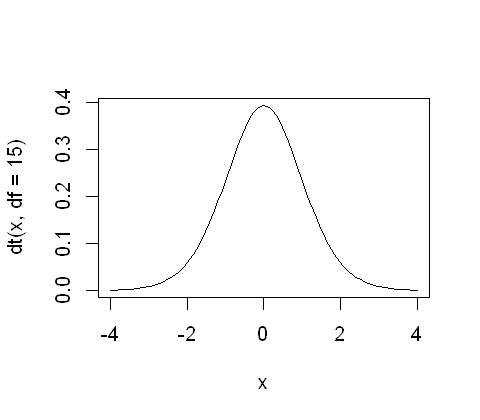

In [41]:
curve(dt(x, df=15), -4,4)

The test statistic (t value in this case) alone does not tell us much, as it is unitless.
The larger the absolute value of the test statistic, the smaller the p-value and the more likely it is that the results do not follow the null hypothesis. Because our statistical tests are based on known distributions, we can compare the test statistic to a critical value and determine how likely it is that this observation would occur due to chance.

Let's look at the t-distribution and check the t value we would expect to see for n=16 observations and df=



 but we would take this value and compare it to the expected value under the null or 'critical value'. If our t value is greater than the critical value, we reject the null hypothesis. 
The larger the absolute value of the test statistic, the more likely it is that the results do not follow the null hypothesis. R does this for us, and reports the p-value, or probability that we are above this 'critical value'. The p-value of 0.28 suggests that there is a 28% chance due to randomness that the mean IQ of the undergrad and grad group are actually different. This is well above the typical 5% threshold, and we fail to reject the null that the mean IQs are the same. Therefore, we conclude that the mean IQ between these groups is not significantly different. It seems that your friends in undergraduate school and grad school have simmilar IQs overall! 

A statistical test always tests against the null hypothesis. You start assuming the null is true, and if you have enough evidence to suggest the null is false you are able to 'reject the null'. This evidence needed to reject the null is often encapsulated in the statistical test "p-value". A p-value is the probability, under the null, of seeing something as extreme or more extreme than what was observed simply due to chance. 

For example, let's assume our null hypothesis is that 

the probability of seeing this value

that you would have observed the result value or larger, simply due to chance. If you have a large p-value (large probability due to chance), you are not confident that your result is real and it could be an artifact of randomness. On the other hand, if you have a small p-value (small probability due to chance) you are more likely to believe your results are not due to randomness but something in your experiment (like a treatment effect from a new drug).

In this case, our p-value of 0.22 suggests that there is a 22% chance due to randomness, and therefore this is not enough evidence to reject the null. Typically, a very small p-value 0.05 (or a 5% chance) is set as a threshold to ensure that the observed result is not due to chance or randomness. Therefore, we accept the null hypothesis that the data is 'normal', and we pass Assumption #2.



p.value is the probability that we would observe that value or larger due to chance. Since 22% is farily high, there is not a lot of evidence against the null hypothesis, we could have observed these results due to chance, and we fail to reject the null hypothesis.

In this instance, the p-value of 0.22 means we have a 22% chance of getting this outcome due to chance. Therefore, this high probability due to chance means we
it means we have a 22% chance of getting this outcome due to randomness aloneThis test p-value is 0.22, which is greater than the typical threshold of 0.05, and means we fail to reject the null that the data is normal. Thus, we can conclude that the data is approximately normal. 